<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:

import nbimporter
from functionForModels import *


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df_preds= pd.read_csv('water_data.csv')
df_target=pd.read_csv('water_targets.csv')

In [3]:
#just for EDA and graphs
merged_data=pd.concat([df_preds,df_target],axis=1,join='inner')


In [4]:
df_preds.describe()
df_preds.shape

(59400, 40)

In [5]:
print(df_preds.isna().sum())
print(df_preds.isna().sum().sum())


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [6]:
list(df_preds['scheme_name'].unique())

['Roman',
 nan,
 'Nyumba ya mungu pipe scheme',
 'Zingibali',
 'BL Bondeni',
 'None',
 "wanging'ombe water supply s",
 'Makanj',
 'Kidabu',
 'Mashangwi',
 'Quick wins Program',
 'Komaka mandaka',
 'Sobodo Borehole Scheme',
 'Kitukuni water supply',
 'BL Mwakikoti',
 'Chalinze wate',
 'Mae pipeline',
 'UNDP',
 'Ngana water supplied scheme',
 'Itun',
 'Bomala',
 'Kirua kahe pumping water trust',
 'Misiwa',
 'Mtwango water supplied sche',
 'K',
 'Machumba estate pipe line',
 'SHIMASA',
 'wangama water supply scheme',
 'Shirimatunda Water Supply',
 'Laela group water Supp',
 'Makwale water supplied sche',
 "Nyang'hwale",
 'Njoro Water Supply',
 'Kirua kahe gravity water supply trust',
 'Olgilai pipe line',
 'Mabula mountains spr',
 'Mkongoro One',
 'Maambreni gravity water supply',
 'Mwando water supply',
 'M',
 'Kaisho/Isingiro w',
 "wanging'ombe supply scheme",
 'Tove Mtwango gravity Scheme',
 'Tengeru gravity water supply',
 'Kulasi water supply',
 'Malemb',
 'Tawa',
 'Loruvani gravity 

In [7]:

merged_data['scheme_name']=merged_data['scheme_name'].fillna('no_scheme')
merged_data.shape

(59400, 42)

In [8]:
print(merged_data.isna().sum())

id                          0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                371
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3877
scheme_name                 0
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [9]:

merged_data.dropna(inplace=True)
merged_data.drop(['id','longitude','latitude','waterpoint_type_group','num_private','region_code','recorded_by','scheme_name'],axis=1,inplace=True)

In [10]:
merged_data.head()
# print(merged_data['lga'].unique())
# print(merged_data['ward'].unique())

# print(merged_data['recorded_by'].unique()) one group ojnly get rid

# print(merged_data['scheme_management'].unique())
# print(list(merged_data['scheme_name'].unique()))  get rid of scheme name evne tho it may be usefull there is to much random names and they seem to be after the names of the location, 
# that the specific company is in but does not change the fact that it is the same comapny most likly same team. can come back
# and look at this laterS

,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,basin,subvillage,region,district_code,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,none,Lake Nyasa,Mnyusi B,Iringa,5,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,4,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,non functional
5,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,Tajiri,Pangani,Moa/Mwereme,Tanga,8,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,functional
6,0.0,2012-10-01,Dwsp,0,DWSP,Kwa Ngomho,Internal,Ishinabulandi,Shinyanga,3,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,non functional


In [11]:

merged_data.describe()


,amount_tsh,gps_height,district_code,population,construction_year
count,48288.000000,48288.000000,48288.000000,48288.000000,48288.000000
mean,360.417379,701.494429,5.754618,176.683048,1342.774747
std,2828.437040,698.811196,9.701979,472.505399,937.146464
min,0.000000,-90.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,463.000000,3.000000,30.000000,1987.000000
75%,50.000000,1335.000000,5.000000,200.000000,2005.000000
max,250000.000000,2770.000000,80.000000,30500.000000,2013.000000


In [12]:
merged_data.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
wpt_name                  object
basin                     object
subvillage                object
region                    object
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_cla

In [13]:
start_x=merged_data.drop('status_group',axis=1)
start_y=merged_data['status_group']

numb_col_only=merged_data.select_dtypes(include=[np.number]).columns
ob_col_only=merged_data.select_dtypes(include=[np.object]).columns

start_x2=start_x.select_dtypes(include=[np.number]).columns
start_y2=merged_data.select_dtypes(include=[np.object]).columns

start_x.drop(ob_col_only[:-1],axis=1)

,amount_tsh,gps_height,district_code,population,construction_year
0,6000.0,1390,5,109,1999
2,25.0,686,4,250,2009
3,0.0,263,63,58,1986
5,20.0,0,8,1,2009
6,0.0,0,3,0,0
...,...,...,...,...,...
59394,500.0,351,6,89,2007
59395,10.0,1210,5,125,1999
59396,4700.0,1212,4,56,1996
59398,0.0,0,4,0,0


<ipython-input-14-fe952701ff62>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  merged_data.hist(ax= ax, bins=75);


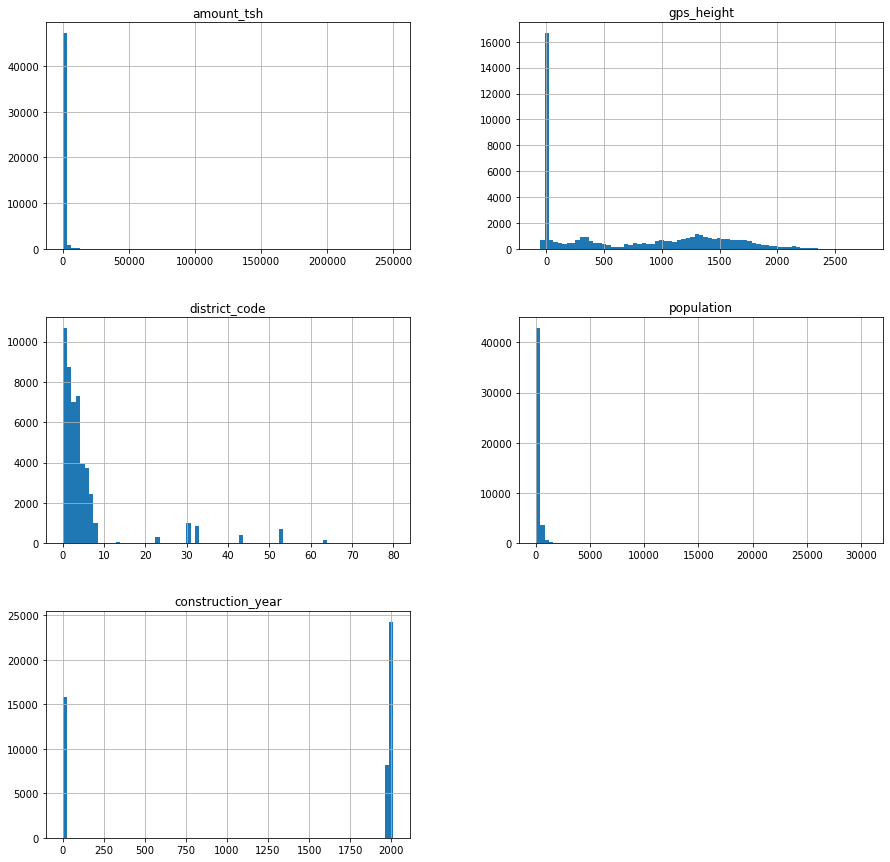

In [14]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

merged_data.hist(ax= ax, bins=75);

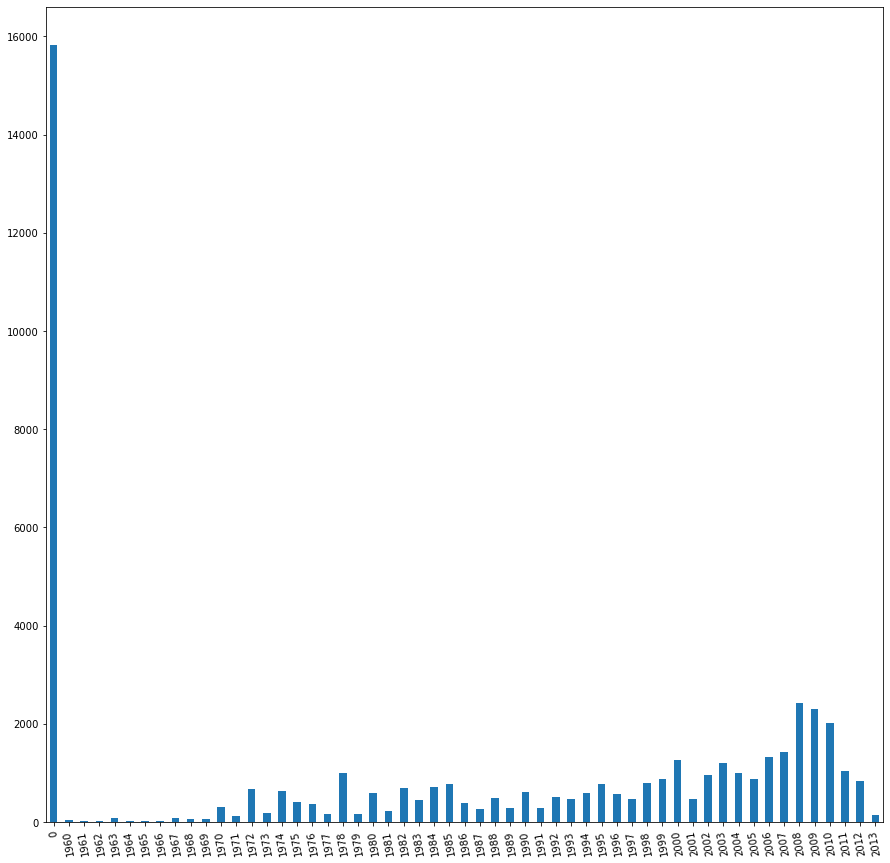

In [15]:

for item in ob_col_only:
    merged_data['construction_year'].value_counts().sort_index().plot(kind='bar',rot=100, linewidth=10, figsize = (15,15))
    plt.show()
    break

<AxesSubplot:xlabel='construction_year'>

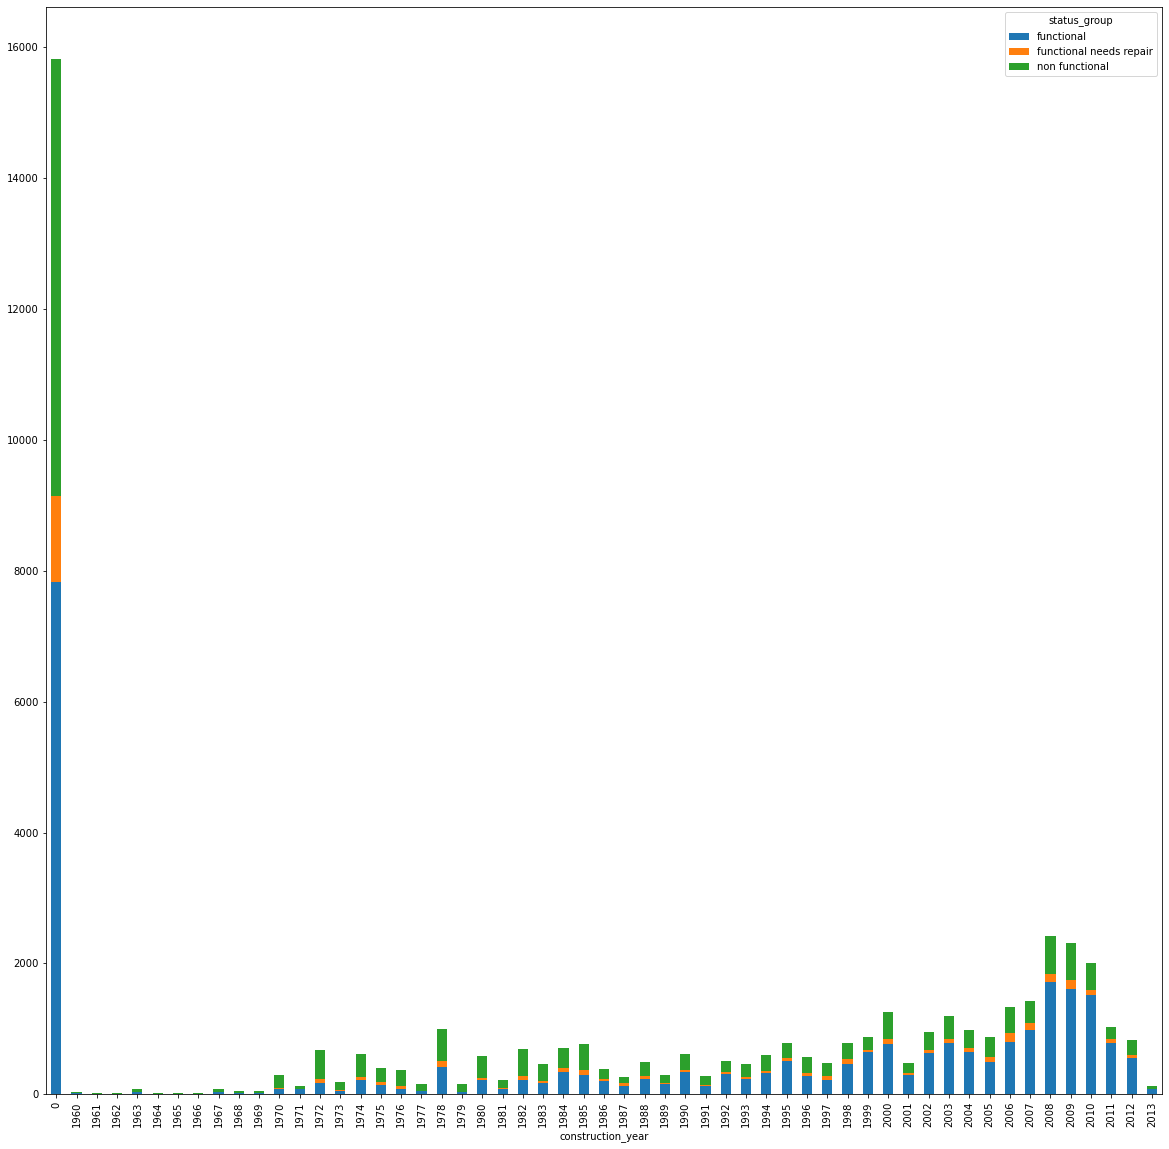

In [16]:
merged_data.groupby(['construction_year','status_group']).size().unstack()[:100].plot(kind='bar', stacked=True,figsize=(20,20))

<AxesSubplot:xlabel='funder'>

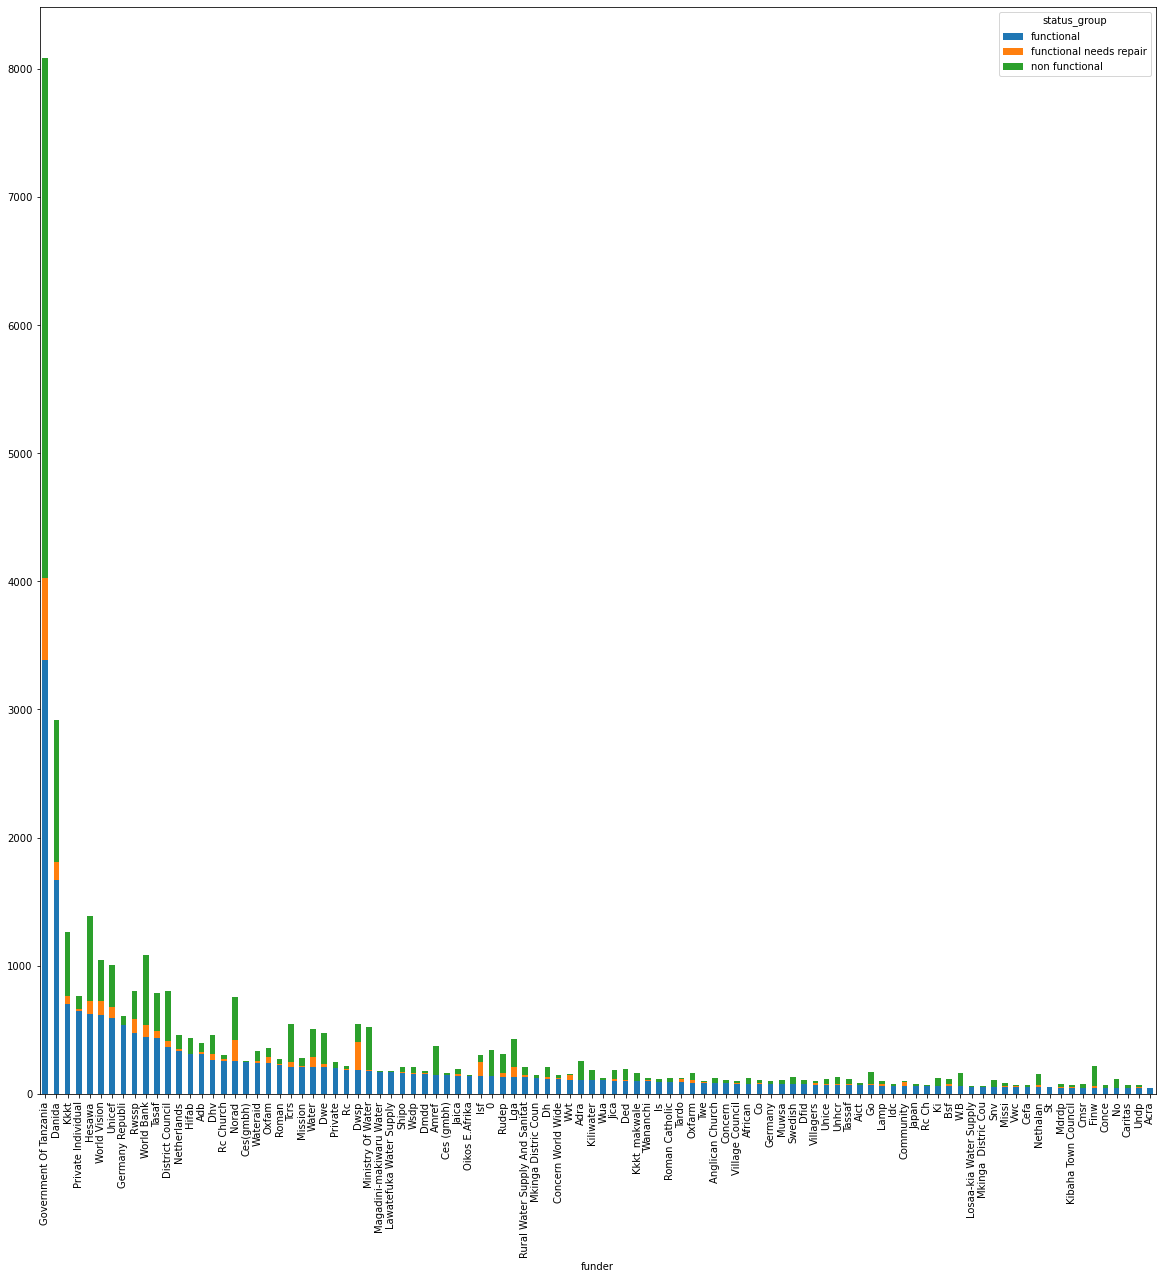

In [17]:
merged_data.groupby(['funder','status_group']).size().unstack().sort_values(by=['functional','non functional'],ascending=False)[:100].plot(kind='bar', stacked=True,figsize=(20,20))

<AxesSubplot:xlabel='funder'>

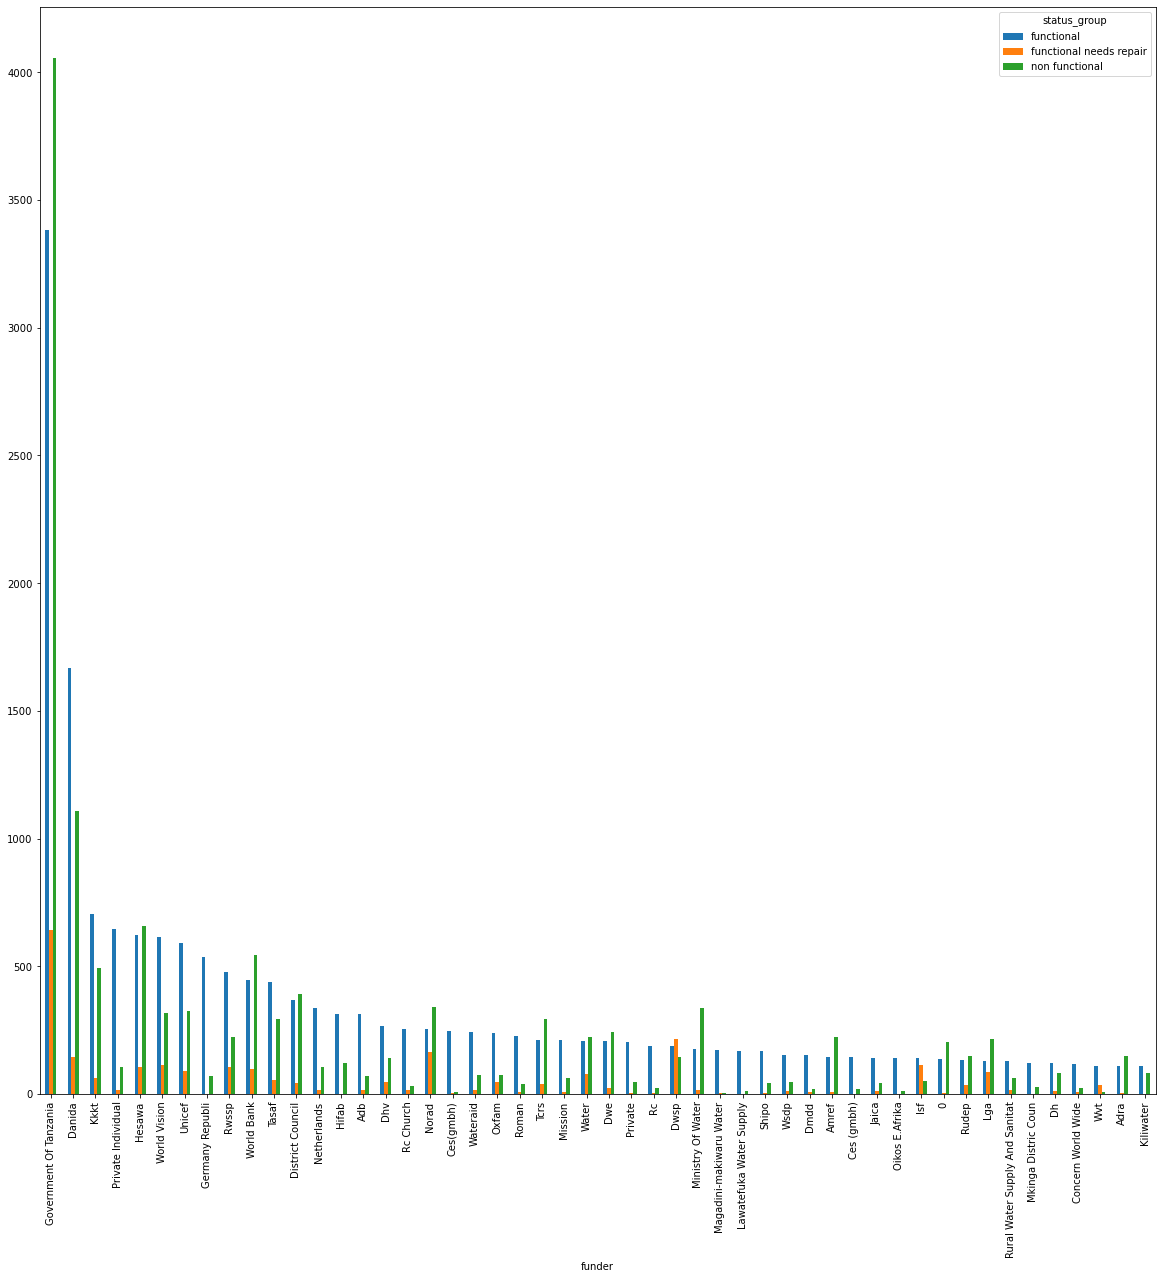

In [18]:
merged_data.groupby(['funder','status_group']).size().unstack().sort_values(by=['functional','non functional'],ascending=False)[:50].plot(kind='bar',figsize=(20,20))

as you can see that gov of tazania is the largest provider but there are some pretty significant companies and organizations.

<AxesSubplot:xlabel='funder'>

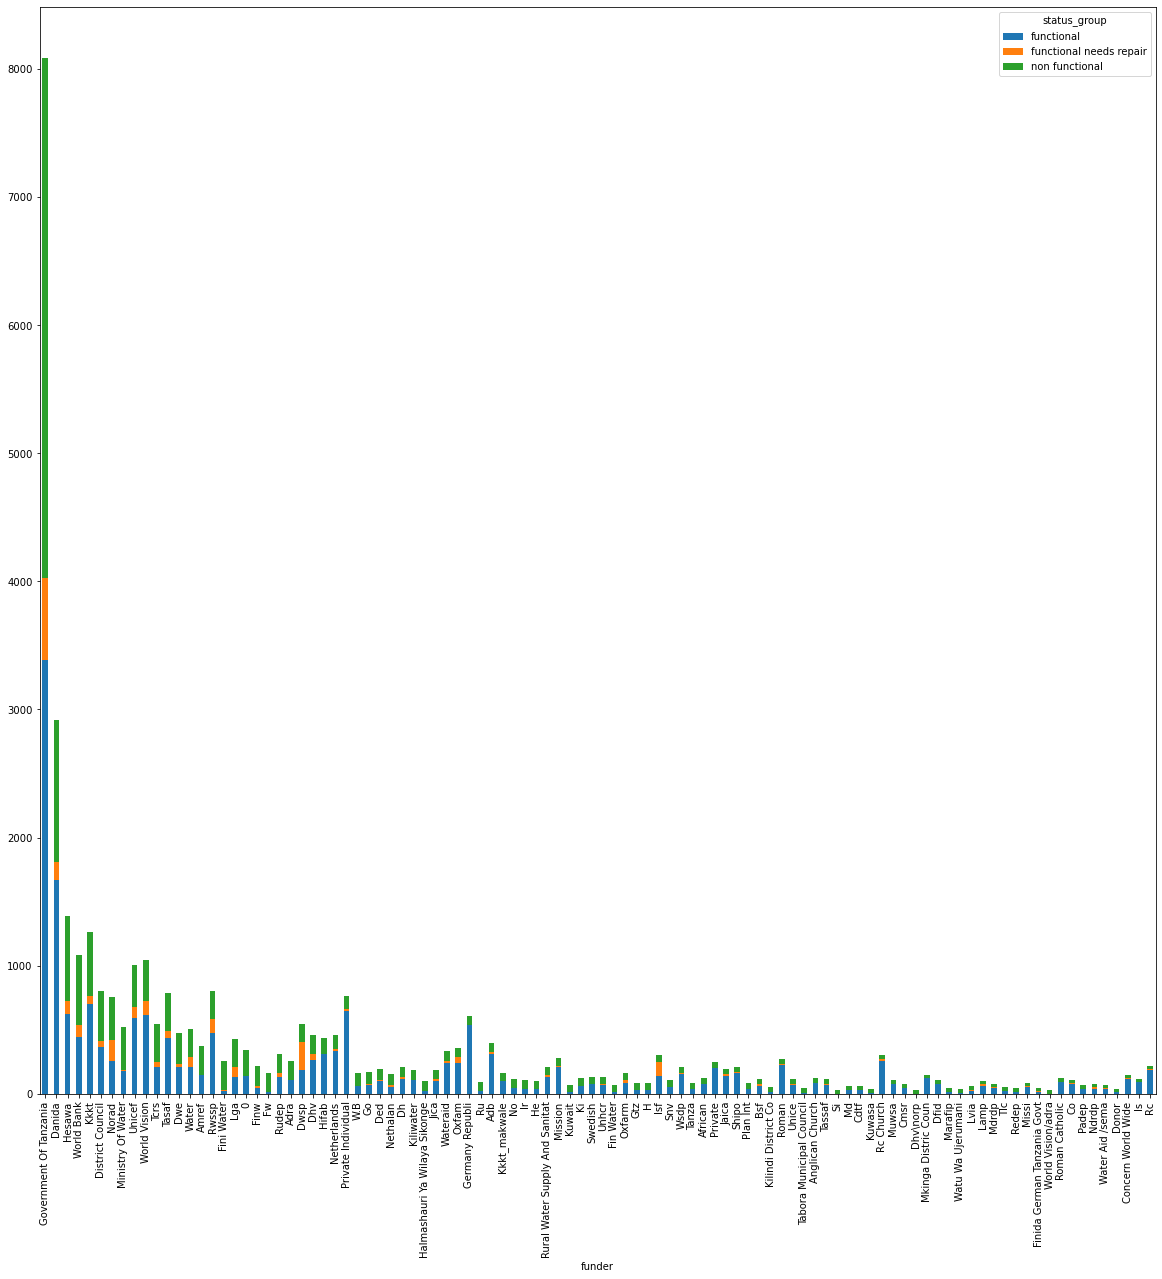

In [19]:
merged_data.groupby(['funder','status_group']).size().unstack().sort_values(by=['non functional','functional'],ascending=False)[:100].plot(kind='bar', stacked=True,figsize=(20,20))

note that you ran this as in need of repair value and very few even pop up as having, you just sorted on the second parameter.

In [20]:
# maybe junk code
merged_data.groupby(by=['funder','status_group']).count()['amount_tsh'][:10].reset_index()#.plot(kind='bar',figsize=(10, 10))

,funder,status_group,amount_tsh
0,0,functional,138
1,0,functional needs repair,3
2,0,non functional,203
3,A/co Germany,functional,7
4,A/co Germany,functional needs repair,1
5,A/co Germany,non functional,7
6,Aar,functional,22
7,Aar,functional needs repair,4
8,Aar,non functional,6
9,Abas Ka,functional,1


below:   you forgot , this is just checking the number of each predictor to see which are more common, as we can see funtional repair is very sparce in this data set. 
note go back and check and see how many of each before you split the data

In [21]:
merged_data.groupby(by=['status_group']).count().iloc[:3,:1]

,amount_tsh
status_group,
functional,26517
functional needs repair,3498
non functional,18273


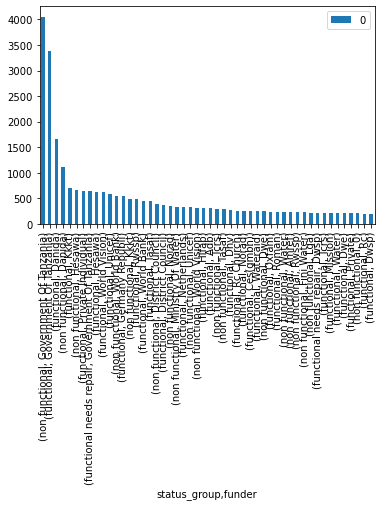

In [22]:
pd.DataFrame(merged_data[['status_group','funder']].value_counts())[:50].plot(kind='bar')
plt.show()

noticed that i started to have some issues with the date values when charting so i decided to just bin them by year. there is a strange pattern with the first part of the year i assume having more projects started and completed as they trail off into end of year. it is just the date the row was added i do not think that would hold to much interperable information.

In [23]:
ob_col_only

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'status_group'],
      dtype='object')

changing year data so it is just the year, and not the interyear information seems like to much detail.

In [24]:
merged_data['date_recorded']=merged_data['date_recorded'].map(lambda x:x[:4])
merged_data['date_recorded'].unique()

array(['2011', '2013', '2012', '2004', '2002'], dtype=object)

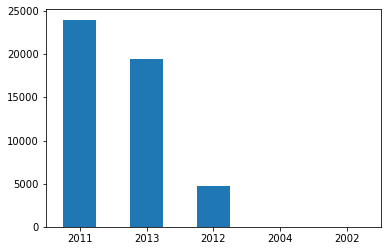

In [25]:
# merged_data[ob_col_only].value_counts().plot(kind='bar')

for item in ob_col_only:
    merged_data[item].value_counts().plot(kind='bar',rot=0)
    
    plt.show()
    break
    

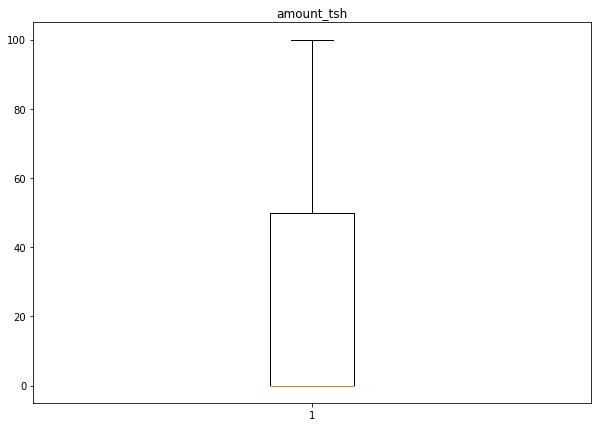

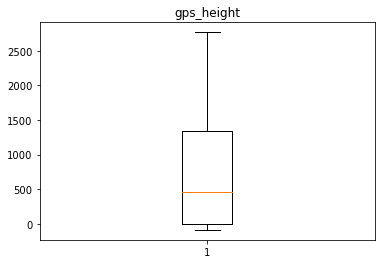

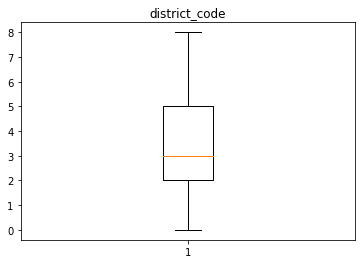

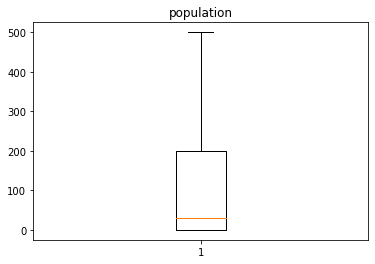

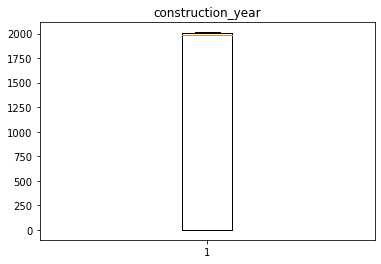

In [26]:
figbox= plt.figure(figsize=(10,7))

for item in numb_col_only:
    plt.boxplot(merged_data[item],showfliers=False)
    plt.title(item)
    plt.show()

amount_tsh


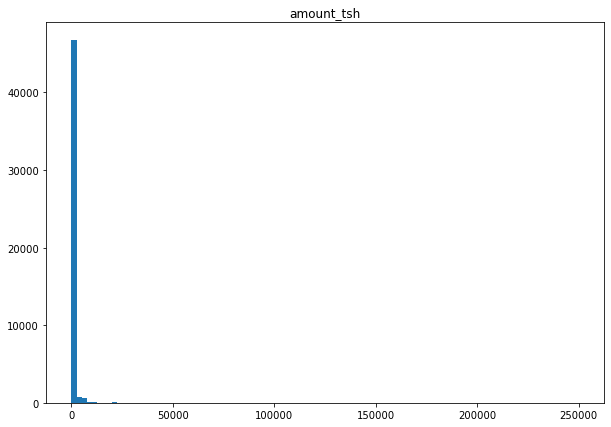

gps_height


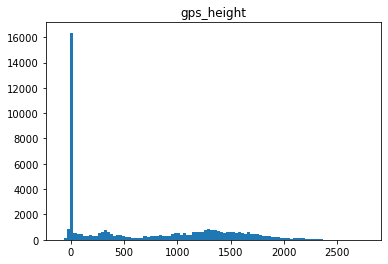

district_code


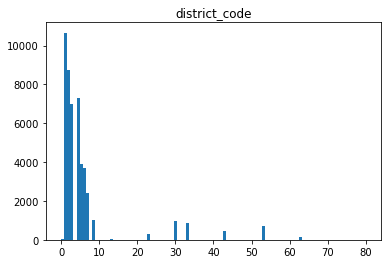

population


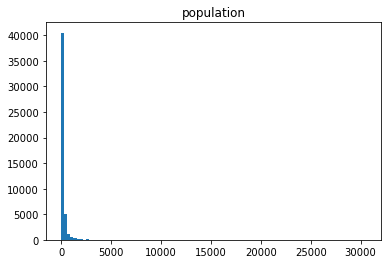

construction_year


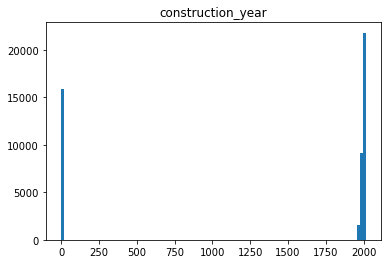

In [33]:


figbox= plt.figure(figsize=(10,7))

for item in numb_col_only:
    print(item)
    plt.hist(start_x[item],bins=100)
    plt.title(item)
    plt.show()

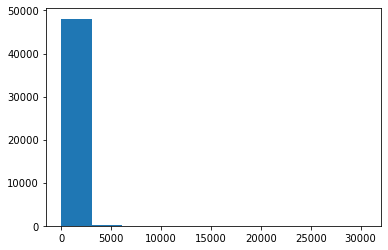

In [50]:
# plt.hist(start_x['population'][::-1],bins=10)
# plt.show()
sns.histplot(data=merged_data,x='population')

<AxesSubplot:xlabel='population'>

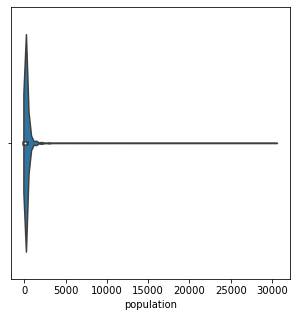

In [65]:
plt.figure(figsize=(5,5))
sns.violinplot(data=merged_data,x='population')

there was a year zero which was probably a erronos values , but there are 15k of them so I do not think we should remove them because that is a majority of my data. which may be a problem.

In [66]:
merged_data['construction_year'][merged_data['construction_year']<=1].count()

15815

<AxesSubplot:>

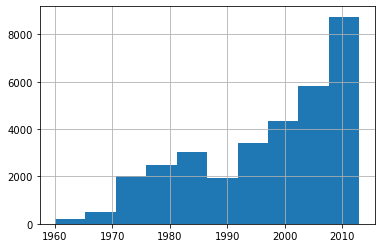

In [67]:
merged_data['construction_year'][merged_data['construction_year']>=10].hist()

<AxesSubplot:>

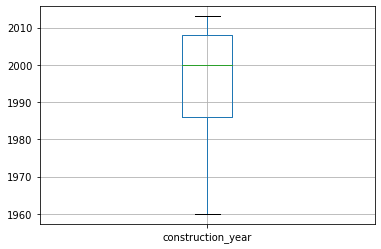

In [68]:
pd.DataFrame(merged_data['construction_year'][merged_data['construction_year']>10]).boxplot()

<AxesSubplot:xlabel='construction_year', ylabel='Count'>

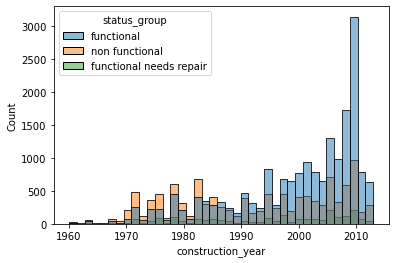

In [72]:
sns.histplot(data=merged_data[merged_data['construction_year']>10],x='construction_year',hue='status_group')

<AxesSubplot:xlabel='installer'>

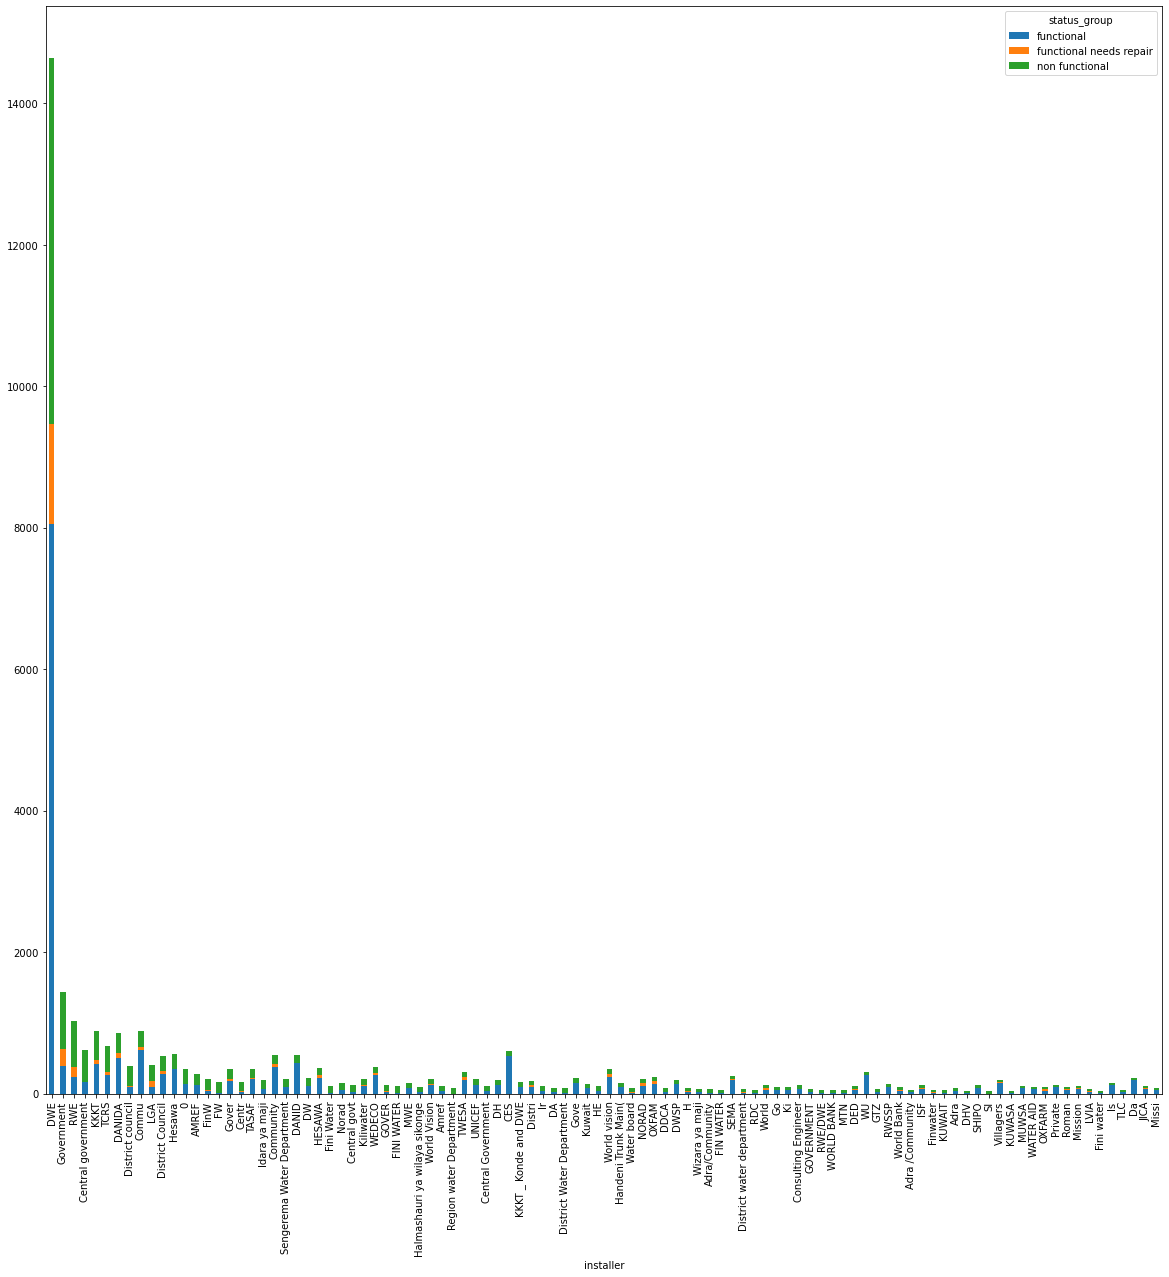

In [73]:
merged_data.groupby(['installer','status_group']).size().unstack().sort_values(by=['non functional','functional'],ascending=False)[:100].plot(kind='bar', stacked=True,figsize=(20,20))

In [74]:
merged_data.groupby(['installer']).count().sort_values(by='amount_tsh',ascending=False)

,amount_tsh,date_recorded,funder,gps_height,wpt_name,basin,subvillage,region,district_code,lga,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,status_group
installer,,,,,,,,,,,,,,,,,,,,,
DWE,14637,14637,14637,14637,14637,14637,14637,14637,14637,14637,...,14637,14637,14637,14637,14637,14637,14637,14637,14637,14637
Government,1438,1438,1438,1438,1438,1438,1438,1438,1438,1438,...,1438,1438,1438,1438,1438,1438,1438,1438,1438,1438
RWE,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,...,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031
Commu,893,893,893,893,893,893,893,893,893,893,...,893,893,893,893,893,893,893,893,893,893
KKKT,885,885,885,885,885,885,885,885,885,885,...,885,885,885,885,885,885,885,885,885,885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICAP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Private Technician,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Private company,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [75]:
pd.DataFrame(merged_data['population']).sort_values(by='population',ascending=False)[:100]

,population
30537,30500
14308,15300
51398,11463
31363,10000
12784,9865
...,...
40226,5000
40199,5000
14001,5000
27088,5000


<AxesSubplot:>

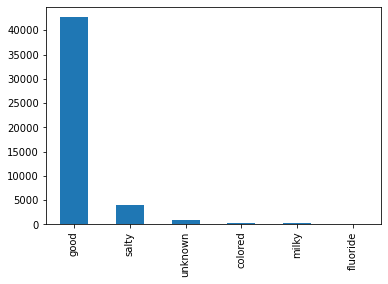

In [76]:
merged_data['quality_group'].value_counts().plot(kind='bar')

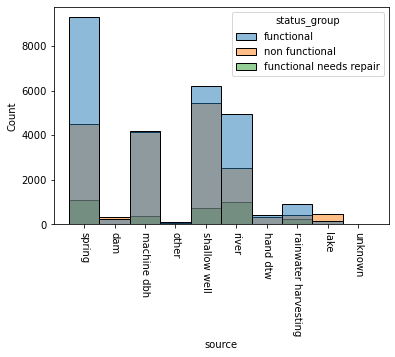

In [88]:
sns.histplot(data=merged_data,x='source',hue='status_group')
fig.tight_layout()
plt.xticks(rotation='270')
plt.show()

['spring' 'dam' 'machine dbh' 'other' 'shallow well' 'river' 'hand dtw'
 'rainwater harvesting' 'lake' 'unknown']


<AxesSubplot:>

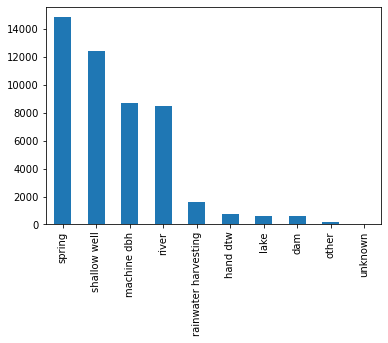

In [77]:
print(merged_data['source'].unique())
merged_data['source'].value_counts().plot(kind='bar')


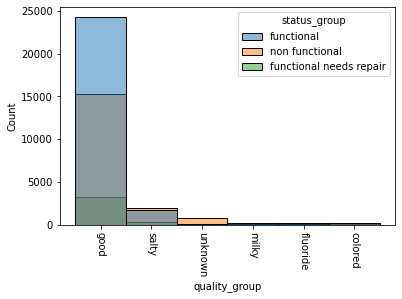

In [89]:
sns.histplot(data=merged_data,x='quality_group',hue='status_group')
fig.tight_layout()
plt.xticks(rotation='270')
plt.show()